## E-Sun Credit Card Fraud Detection task
- competition end at 12/30

- <a href="https://tbrain.trendmicro.com.tw/Competitions/Details/8">Website</a>

- include all Exploratory in this notebook

### Column description

In [525]:
from IPython.display import IFrame
IFrame("dataset_description.pdf", width=600, height=300)

In [2]:
# import modules
%matplotlib inline
import scipy.stats as stats
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [532]:
train_raw = pd.read_csv('train.csv')

In [533]:
N, N_f = train_raw.shape #1521787 obs, 23 raw_f

In [5]:
train_raw.sample(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
969942,6881,142046,102665,513.80,5,0,N,0,N,N,...,0,5,183639.0,457,74337,N,0,102,0,482517
474953,6215,7466,157434,500.14,5,62,Y,2,N,N,...,0,7,211452.0,289,54828,N,3460,46,0,1839977
1372,6769,132177,1873,173.56,5,62,N,5,N,N,...,0,56,104754.0,247,85363,N,5800,102,0,375044
341426,6189,145635,116622,480.41,5,62,N,4,N,N,...,0,50,182634.0,263,93893,N,5817,102,0,1077765
419439,6769,41976,19388,216.12,5,62,N,5,N,N,...,0,4,133246.0,251,78020,N,5829,102,0,448902


In [8]:
train_raw.isnull().sum() # flbmk & flg_3dsmk both got 12581 null

acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        12581
flg_3dsmk    12581
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64

In [177]:
# transter Y/N to 1/0
def to_dummy(i):
    d = {'Y':1, 'y':1, 'N':0,'n':0}
    try:
        return d[i]
    except:
        return i


isObjCol = train_raw.dtypes=='object'
isObjCol = isObjCol[isObjCol==True].index
if len(isObjCol) >0:
    train_raw[isObjCol] = train_raw.select_dtypes(['object']).applymap(lambda x:to_dummy(x))
    #train_raw.select_dtypes(['object']).isnull().sum()


In [534]:
train_raw.flbmk.unique() # [0., 1., nan]
train_raw.flg_3dsmk.unique() # [0., 1., nan]
train_raw.replace(np.NaN, -1,inplace = True)

### describe of txn number and avg_txn_amt
- avg txn number about ``12`` within 90 days
- avg txn amount for txn abount ``NTD730``
- a weired account found, should be drop out


In [109]:
txn_num_ByAc = train_raw.groupby(['bacno','cano']).agg({'txkey':'count', 'conam':'mean'})
pd.set_option('precision', 2)
txn_num_ByAc.describe()

,txkey,conam
count,129413.00,129413.00
mean,11.76,730.77
std,15.91,367.18
min,1.00,0.00
25%,3.00,513.80
50%,7.00,662.07
75%,15.00,844.82
max,1117.00,6728.97


In [205]:
# weried acct
weired = txn_num_ByAc[txn_num_ByAc['txkey'] == 1117]
what = weired.join(train_raw.set_index(['bacno','cano']), how = 'left', lsuffix = 'w',rsuffix='raw')
what

txkeyw     conamw  acqic  conamraw  contp  csmcu  ecfg  etymd  \
bacno  cano                                                                   
148859 71502    1117  469.88286      0    465.62      5      0     0      2   
       71502    1117  469.88286      0    465.62      5      0     0      2   
       71502    1117  469.88286      0    465.62      5      0     0      2   
       71502    1117  469.88286      0    465.62      5      0     0      2   
       71502    1117  469.88286      0    465.62      5      0     0      2   
...              ...        ...    ...       ...    ...    ...   ...    ...   
       71502    1117  469.88286      0    465.62      5      0     0      2   
       71502    1117  469.88286      0    465.62      5      0     0      2   
       71502    1117  469.88286   6716   1502.03      5     62     0      4   
       71502    1117  469.88286      0    465.62      5      0     0      2   
       71502    1117  469.88286      0    465.62      5      0     0      2   

              flbmk  flg_3dsmk  ...  iterm  locdt     loctm  mcc  mchno  \
bacno  cano                     ...                                       
148859 71502    0.0        0.0  ...      0     10  104626.0  451      0   
       71502    0.0        0.0  ...      0     25  110026.0  451      0   
       71502    0.0        0.0  ...      0     65  101720.0  451      0   
       71502    0.0        0.0  ...      0     81  101923.0  451      0   
       71502    0.0        0.0  ...      0     60  102053.0  451      0   
...             ...        ...  ...    ...    ...       ...  ...    ...   
       71502    0.0        0.0  ...      0      1  105222.0  451      0   
       71502    0.0        0.0  ...      0      1  104724.0  451      0   
       71502    0.0        0.0  ...      0      1  162342.0  388  61883   
       71502    0.0        0.0  ...      0      5  105123.0  451      0   
       71502    0.0        0.0  ...      0      4  104619.0  451      0   

              ovrlt  scity  stocn  stscd  txkeyraw  
bacno  cano                                         
148859 71502      0   5817    102      0      4571  
       71502      0   5817    102      0     12304  
       71502      0   5817    102      0     31174  
       71502      0   5817    102      0     39622  
       71502      0   5817    102      0     28981  
...             ...    ...    ...    ...       ...  
       71502      0   5817    102      0       316  
       71502      0   5817    102      0        88  
       71502      0   5803    102      0   1618896  
       71502      0   5817    102      0      2546  
       71502      0   5817    102      0      1696  

[1117 rows x 23 columns]

In [186]:
what.head()

txkeyw     conamw  acqic  conamraw  contp  csmcu ecfg  etymd  \
bacno  cano                                                                  
148859 71502    1117  469.88286      0    465.62      5      0    N      2   
       71502    1117  469.88286      0    465.62      5      0    N      2   
       71502    1117  469.88286      0    465.62      5      0    N      2   
       71502    1117  469.88286      0    465.62      5      0    N      2   
       71502    1117  469.88286      0    465.62      5      0    N      2   

             flbmk flg_3dsmk  ...  iterm  locdt     loctm  mcc  mchno  ovrlt  \
bacno  cano                   ...                                              
148859 71502     N         N  ...      0     10  104626.0  451      0      N   
       71502     N         N  ...      0     25  110026.0  451      0      N   
       71502     N         N  ...      0     65  101720.0  451      0      N   
       71502     N         N  ...      0     81  101923.0  451      0      N   
       71502     N         N  ...      0     60  102053.0  451      0      N   

              scity  stocn stscd  txkeyraw  
bacno  cano                                 
148859 71502   5817    102     0      4571  
       71502   5817    102     0     12304  
       71502   5817    102     0     31174  
       71502   5817    102     0     39622  
       71502   5817    102     0     28981  

[5 rows x 23 columns]

In [114]:
what.groupby(['locdt']).agg({'txkeyw':'count','conamraw':[sum, 'mean']})

txkeyw  conamraw        
       count       sum    mean
locdt                         
1         23  11745.67  510.68
2         14   6518.68  465.62
3         11   5121.82  465.62
4         21   9778.02  465.62
5          9   5583.67  620.41
...      ...       ...     ...
86        12   5587.44  465.62
87        14   6518.68  465.62
88        23  11148.18  484.70
89         8   3724.96  465.62
90        19   8846.78  465.62

[90 rows x 3 columns]

### Note
fraud/non-fraud: 1501432/20355 about 74:1

--> acc = <b>0.9864</b> if guess all non_fraud

In [7]:
fraud = train_raw.fraud_ind == 1
non_fraud = train_raw.fraud_ind == 0
train_raw.groupby(['fraud_ind']).agg({'txkey':'count'})

,txkey
fraud_ind,
0,1500315
1,20355


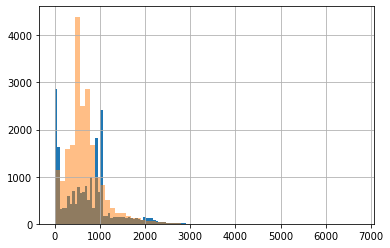

In [123]:
train_raw['conam'][fraud].hist(bins=60) # fit a prob dist for txn_amt
train_raw['conam'][non_fraud].sample(int(N/74)).hist(bins=60, alpha=0.5)
plt.show()
# either 100 or 1000 why ?????

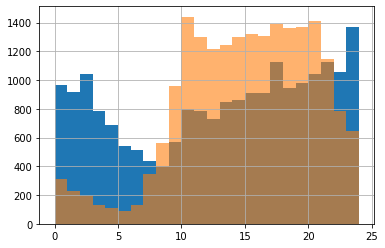

In [121]:
# txn time by all, fraud, non fraud
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12,6))

(train_raw.loctm[fraud]/10000).round().map(int).hist(bins=24)
(train_raw.sample(int(N/74)).loctm[non_fraud]/10000).round().map(int).hist(bins=24,alpha=0.6)

plt.show()

### feature correlation


Text(0.5,1,'Heatmap of Correlation')

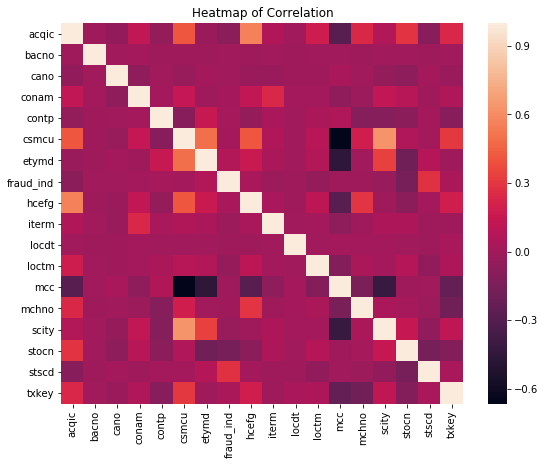

In [7]:
corr = train_raw.corr()
plt.figure(figsize=(9,7))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [8]:
corr['fraud_ind'].sort_values()

stocn       -0.161405
acqic       -0.083684
loctm       -0.042688
scity       -0.028715
iterm       -0.014662
mchno       -0.012187
locdt       -0.011773
mcc         -0.002827
bacno        0.000285
cano         0.004608
csmcu        0.013472
conam        0.016634
contp        0.023248
hcefg        0.026210
txkey        0.034034
etymd        0.067743
stscd        0.279225
fraud_ind    1.000000
Name: fraud_ind, dtype: float64

#### fraud_ind have some corr with stscd & stocn?

狀態碼?? 消費地國別

In [130]:
train_raw.groupby(['stscd','fraud_ind']).agg({'txkey':'count'})
pd.set_option('precision', 3)
train_raw.groupby(['stscd']).agg({'fraud_ind':'mean'})
# transform stscd to one-hot-encoding

,fraud_ind
stscd,
0,0.010
1,0.061
2,0.305
3,0.000
4,0.000


In [526]:
pd.set_option('precision', 5)
stocn_ratio= train_raw.groupby(['stocn']).agg({'fraud_ind':['count','mean']})#.column=['fraud_cnt', 'fraud_mean']
#    .sort_values('mean',ascending=False)
stocn_ratio.columns=['fraud_cnt', 'fraud_mean']
stocn_ratio.sort_values('fraud_mean',ascending =False).head(20)
#transfrom stocn to ratio value

,fraud_cnt,fraud_mean
stocn,,
18.0,1,1.00000
53.0,17,0.94118
30.0,88,0.72727
96.0,13,0.69231
7.0,5,0.60000
37.0,2,0.50000
91.0,11,0.45455
39.0,12,0.41667
94.0,102,0.35294


# to do:
    V drop txn from unusual acct
    -/ fit a prob dist for txn_amt --> to hard... need to study
        -> use histogram paramater
    V encode date + time into weekday * hr -> 24 * 7 categories
    V transform stscd to one-hot-encoding
    V transfrom stocn to ratio value

### - drop txn from unusual acct

In [535]:
weired = train_raw[(train_raw.cano==71502)].index
train_raw.drop(weired,inplace = True)

In [537]:
train_raw.shape

(1520670, 23)

### - fit a prob dist for txn_amt
- to hard...
- see fit_dist to study


    -> use histogram paramater instead()

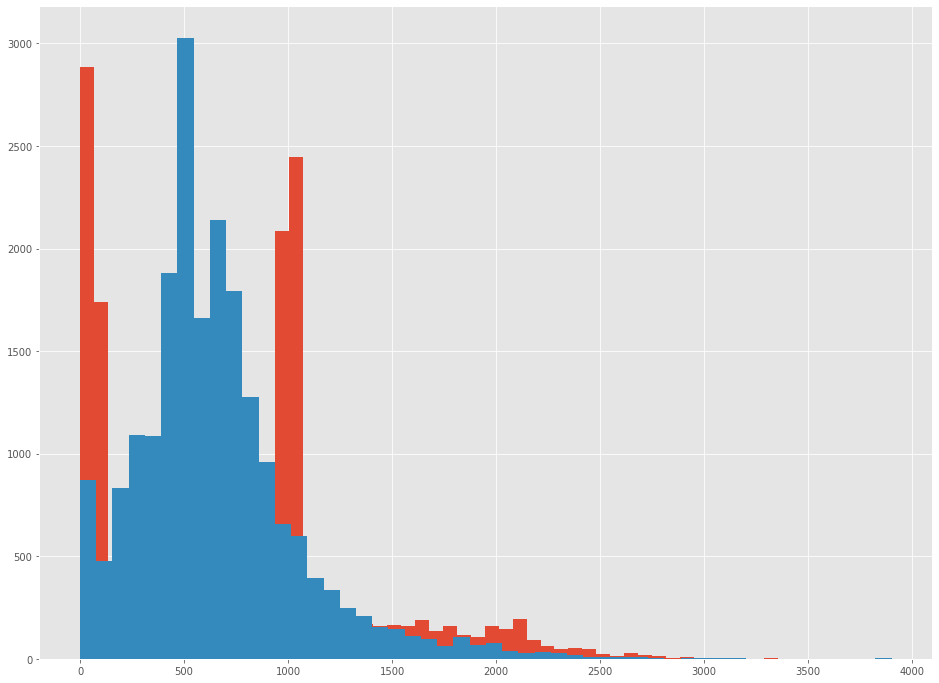

In [538]:
para_f = plt.hist(train_raw['conam'][fraud],bins=50) # fit a prob dist for txn_amt
para_nf =plt.hist(train_raw['conam'][non_fraud].sample(int(N/74)), bins=50)

In [539]:
ratio = list(map(lambda x: 0 if x == np.Inf else x,(para_f[0]/para_nf[0])))+[0]
txn_amt_cvt = np.array([para_f[1], np.array(ratio)])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [540]:
def cvt_txn(amt):
    if amt >txn_amt_cvt[0,-1] or amt <txn_amt_cvt[0,0]:
        return 0
    
    start = 0
    end = txn_amt_cvt.shape[1]-1
    flg = True
    while flg:
        mid = int(round((start + end)/2,0))
        if amt < txn_amt_cvt[0,mid]:
            end = mid
        else:
            start = mid
            
        while abs(start-end) == 1:
            flg= False
            return txn_amt_cvt[1,start]       

In [541]:
train_raw['txn_amt_trn'] = train_raw['conam'].apply(cvt_txn)

### - encode date + time into weekday * hr -> 24 x 7 categories

In [543]:
train_raw['week_day'] = train_raw.locdt%7
train_raw['time_hr'] = round(train_raw.loctm/100000).astype(int)

In [544]:
train_raw

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,txn_amt_trn,week_day,time_hr
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,457,59333,N,0,102,0,516056,0.43442,5,2
1,0,134508,45725,465.62,5,0,N,2,N,N,...,451,0,N,5817,102,0,4376,0.26279,2,1
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,457,59333,N,0,102,0,483434,0.43442,6,2
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,247,50436,N,3281,102,0,1407164,7.32335,5,2
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,263,93775,N,5817,102,0,1051004,0.77116,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,Y,8,-1,-1,...,209,38222,N,5817,102,0,1478280,0.35467,4,2
1521783,3226,145107,116252,435.32,5,75,Y,8,-1,-1,...,192,90135,N,1458,102,0,661087,0.26279,6,1
1521784,6769,162168,93598,1.38,5,75,Y,8,-1,-1,...,373,79246,N,5817,102,0,167073,3.29977,1,2
1521785,6032,45406,197460,1.38,5,75,Y,2,-1,-1,...,373,79246,N,5817,102,0,338215,3.29977,3,2


In [545]:
train_raw_copy = train_raw

### - transform stscd to one-hot-encoding

In [546]:
from sklearn.preprocessing import OneHotEncoder

In [547]:
OHE = OneHotEncoder(handle_unknown='ignore')
OHE.fit(train_raw[['stscd']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [570]:
stscd_OHE = pd.DataFrame(OHE.transform(train_raw[['stscd']]).toarray(),columns = ['stscd_%s'%i for i in range(len(train_raw.stscd.unique()))],index = train_raw.index)

In [587]:
train_raw = pd.concat([train_raw, stscd_OHE] ,axis=1)

### - transfrom stocn to ratio value

In [527]:
stocn_ratio

,fraud_cnt,fraud_mean
stocn,,
0.0,131,0.05344
1.0,536,0.28918
2.0,275,0.04727
3.0,1,0.00000
4.0,39,0.05128
...,...,...
102.0,1312358,0.00095
104.0,33496,0.20098
105.0,7,0.00000


In [592]:
train_raw = train_raw.join(stocn_ratio['fraud_mean'], how='left', on = 'stocn')

In [593]:
train_raw.columns.values

array(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg',
       'etymd', 'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'insfg',
       'iterm', 'locdt', 'loctm', 'mcc', 'mchno', 'ovrlt', 'scity',
       'stocn', 'stscd', 'txkey', 'txn_amt_trn', 'week_day', 'time_hr',
       'stscd_0', 'stscd_1', 'stscd_2', 'stscd_3', 'stscd_4',
       'fraud_mean'], dtype=object)

# What Change is made:
1. replace NaN in flbmk & flg_3dsmk to -1
    > train_raw.replace(np.NaN, -1,inplace = True)
2. drop txn from unusual acct
    >(drop 1117 record)
3. feature engineering:
    > - fit a prob dist for txn_amt --> to hard... need to study
    > -> use histogram paramater
        - txn_amt_trn
    > - encode date + time into weekday * hr -> 24 * 7 categories
        -  week_day
        -  time_hr
    > - transform stscd to one-hot-encoding
        - stscd0 - stsc4
    > - transfrom stocn to ratio value
        - fraud_mean